In [1]:
import xarray as xr
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

# Spin up a little cluster with `dask-jobqueue`

### Specs for an individual worker

In [2]:
cluster = SLURMCluster(walltime='00:10:00', cores=1, memory='6GB', job_extra=['--qos="express"'])

### Scale up to n workers

In [3]:
cluster.scale(jobs=4)

In [5]:
client = Client(cluster)
client

Client Scheduler: tcp://10.141.3.76:35851 Dashboard: http://10.141.3.76:8787/status,Cluster Workers: 4 Cores: 4 Memory: 24.00 GB


# Do something with the cluster

In [6]:
test = xr.open_zarr('/scratch1/projects/dcfp/data/csiro-dcfp-cafe-d60/atmos_isobaric_month.zarr',
                    consolidated=True)

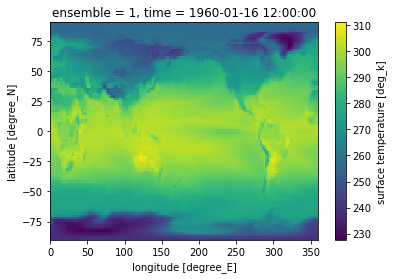

In [9]:
test['t_surf'].isel(ensemble=0, time=0).plot()

In [10]:
cluster.close()
client.close()